<a href="https://colab.research.google.com/github/Deeksha-Analyst/E-Commerce-Customer-Satisfaction-Score-Prediction-Deep-Learning/blob/main/E_commerces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Project Name**

**E-Commerce Customer Satisfaction Score Prediction Deep Learning**

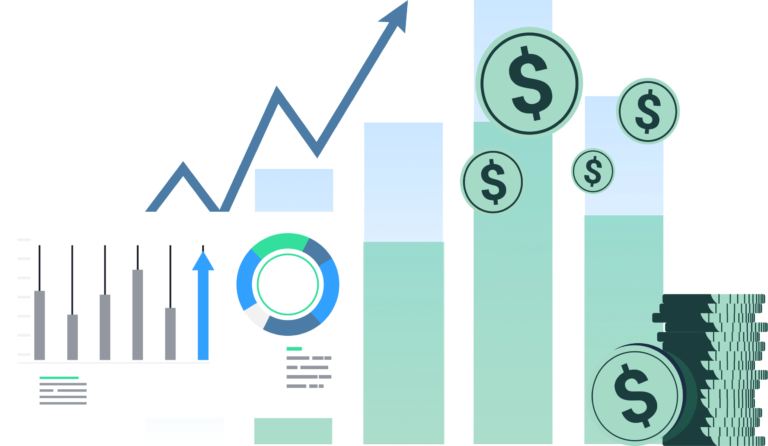

This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement

**About Dataset**

The dataset captures customer satisfaction scores for a one-month period at an e-commerce platform called Shopzilla (a pseudonym). It includes various features such as category and sub-category of interaction, customer remarks, survey response date, category, item price, agent details (name, supervisor, manager), and CSAT score etc.

**Project Goal** = primary goal of this project is to develop a deep learning model that can accurately predict the CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real-time, thereby improving service quality and fostering customer loyalty.

https://github.com/Deeksha-Analyst/E-Commerce-Customer-Satisfaction-Score-Prediction-Deep-Learning/commit/5132746fc8b3a776d5393f58616bb89555eedf1d

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# For better visualizations
sns.set_palette("pastel")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import datetime as dt




In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df  = pd.read_csv("/content/drive/MyDrive/Project/Specialisation Track/Project 4 : E-Commerce Customer Satisfaction Score Prediction Deep Learning/Customer_support_data.csv")

In [13]:
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [14]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [15]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
# Groupby Channel name Wise w.r.t Customer satisfaction score data
grouped_df = df.groupby('channel_name').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df

,Count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


Variables Description

Unique id: Unique identifier for each record (integer).

Channel name: Name of the customer service channel (object/string),3 unique channel name.

Category: Category of the interaction (object/string) ,12 unique category.

Sub-category: Sub-category of the interaction (object/string),57 unique sub-category.

Customer Remarks: Feedback provided by the customer (object/string).

Order id: Identifier for the order associated with the interaction (integer).

Order date time: Date and time of the order (datetime).

Issue reported at: Timestamp when the issue was reported (datetime).

Issue responded: Timestamp when the issue was responded to (datetime).

Survey response date: Date of the customer survey response (datetime).

Customer city: City of the customer (object/string),1782 unique Customer city.

Product category: Category of the product (object/string),9 unique product category.

Item price: Price of the item (float).

Connected handling time: Time taken to handle the interaction (float).

Agent name: Name of the customer service agent (object/string),1371 unique agent name.

Supervisor: Name of the supervisor (object/string),40 unique Supervisor.

Manager: Name of the manager (object/string),6 unique manager.

Tenure Bucket: Bucket categorizing agent tenure (object/string).

Agent Shift: Shift timing of the agent (object/string).

CSAT Score: Customer Satisfaction (CSAT) score (integer) (Target-Variable).

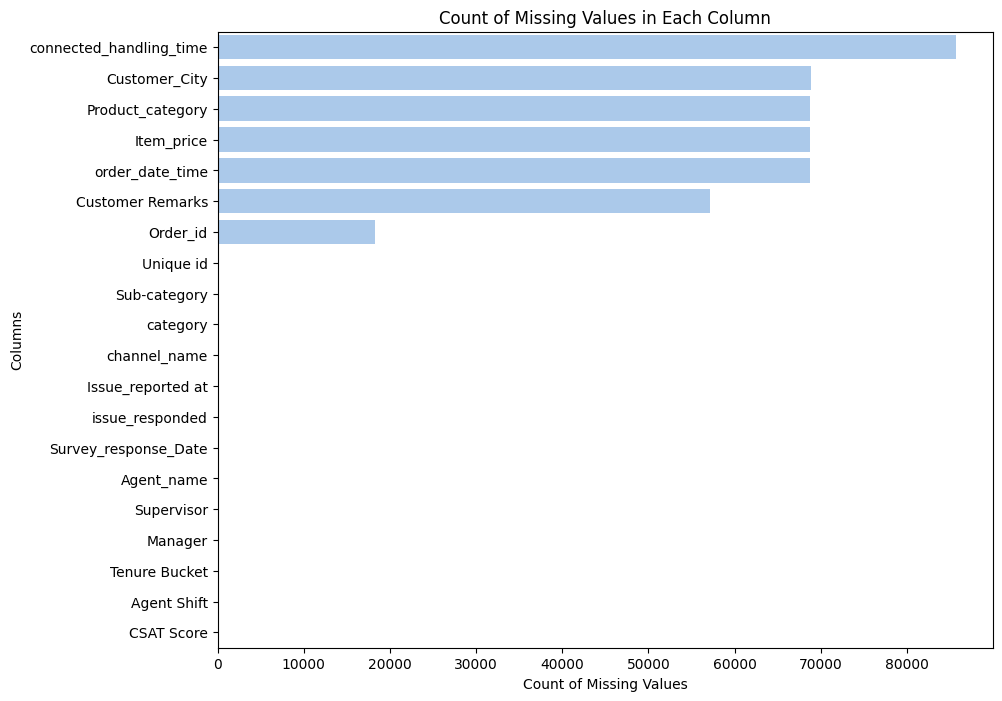

In [ ]:
# Visualizing the missing values

# Step 1: Calculate the count of missing values in each column and sort in descending order
missing_values = df.isnull().sum().sort_values(ascending=False)


# Step 2: Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_values, y=missing_values.index, orient='h')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
plt.title('Count of Missing Values in Each Column')
plt.show()


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_price,17206.0,5660.774846,12825.728411,0.0,392.0,979.0,2699.75,164999.0
connected_handling_time,242.0,462.400826,246.295037,0.0,293.0,427.0,592.25,1986.0
CSAT Score,85907.0,4.242157,1.378903,1.0,4.0,5.0,5.00,5.0


Describe is actually an 5 point summary which will calculate for numerical values. So the reason only 3 variable got described.

Item_price and connected_handling_time has its bell shape curve with a huge left skewness. and these both seems to have too many outlier, which can be clearly explained in visualization.

CSAT variable has numerical Dtype but it looks like a categorical variable.

In [ ]:
for i in df.columns:
    print(df[i].value_counts())

Unique id
07c7a878-0d5a-42e0-97ef-de59abec0238    1
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f    1
b07ec1b0-f376-43b6-86df-ec03da3b2e16    1
c0d72065-e4c8-449b-9d55-cadb690b9c54    1
49e1675a-e890-4d27-93a0-51e67a44d86a    1
                                       ..
372b51a5-fa19-4a31-a4b8-a21de117d75e    1
11a3ffd8-1d6b-4806-b198-c60b5934c9bc    1
1cfde5b9-6112-44fc-8f3b-892196137a62    1
ba903143-1e54-406c-b969-46c52f92e5df    1
eb0d3e53-c1ca-42d3-8486-e42c8d622135    1
Name: count, Length: 85907, dtype: int64
channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64
category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64
Sub-category
Reverse Picku

In [ ]:
# finding null values and unique value counts
null_values= round(df.isnull().sum() * 100 / len(df),2)
unique_values=df.nunique()
analysis_df = pd.DataFrame({'column_name': df.columns,"unique_values": unique_values,'null_values_%': null_values,"data_type":df.dtypes})
analysis_df.reset_index(drop=True,inplace=True)
analysis_df

,column_name,unique_values,null_values_%,data_type
0,Unique id,85907,0.00,object
1,channel_name,3,0.00,object
2,category,12,0.00,object
3,Sub-category,57,0.00,object
4,Customer Remarks,18231,66.54,object
5,Order_id,67675,21.22,object
6,order_date_time,13766,79.96,object
7,Issue_reported at,30923,0.00,object
8,issue_responded,30262,0.00,object
9,Survey_response_Date,31,0.00,object


Cleaning Data
By looking above analysis we could notice categories such as Unique ID, Customer Remark and Order_ID wont be usefull for further analysis so we suppose to drope those Variables.

Some object variables looks to be like time stamp columns. So the data type need to get change for those variables.

Some Object and float dtype variables has filled with NAN. Those needs to get filled as per needs.

In [ ]:
df1=df.drop(["Unique id","Customer Remarks","Order_id","order_date_time"],axis=1)
df1.sample(n=2)

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
47998,Inbound,Returns,Reverse Pickup Enquiry,19/08/2023 11:52,19/08/2023 12:21,19-Aug-23,NaN,NaN,NaN,NaN,Kimberly Oliver,Zoe Yamamoto,William Kim,On Job Training,Morning,1
32558,Inbound,Returns,Missing,13/08/2023 16:36,13/08/2023 16:37,13-Aug-23,NaN,NaN,NaN,NaN,Haley Carroll,William Park,John Smith,61-90,Evening,5


In [ ]:
#Replacing object dtype to timestamp dtype
col=['Issue_reported at','issue_responded','Survey_response_Date']
for i in col:
    df1[i]=pd.to_datetime(df1[i],dayfirst=True)
    print(i,": dtype =",df1[i].dtype)

Issue_reported at : dtype = datetime64[ns]
issue_responded : dtype = datetime64[ns]
Survey_response_Date : dtype = datetime64[ns]


/tmp/ipython-input-13-2410285425.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1[i]=pd.to_datetime(df1[i],dayfirst=True)


In [ ]:
#Replacing null value according to needs
for i in df1.columns:
    if (df1[i].isnull().sum()>0 and df1[i].dtype=="object"):
        df1[i].fillna("Unknown",inplace=True)
        print(i, "Variable has object dtype, so it got Replace its null values to Unknown \n")
    elif (df1[i].isnull().sum()>0 and df1[i].dtype=="float64"):
        df1[i].fillna(df1[i].median(),inplace=True)
        print(i, "Variable has float dtype, so it got Replace its null values to columns median value \n")

Customer_City Variable has object dtype, so it got Replace its null values to Unknown 

Product_category Variable has object dtype, so it got Replace its null values to Unknown 

Item_price Variable has float dtype, so it got Replace its null values to columns median value 

connected_handling_time Variable has float dtype, so it got Replace its null values to columns median value 



/tmp/ipython-input-14-1082581307.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].fillna("Unknown",inplace=True)
/tmp/ipython-input-14-1082581307.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
# finding null values and unique value counts
null_values1= round(df1.isnull().sum() * 100 / len(df),2)
unique_values1=df1.nunique()
analysis_df1 = pd.DataFrame({'column_name': df1.columns,"unique_values": unique_values1,'null_values_%': null_values1,"data_type":df1.dtypes})
analysis_df1.reset_index(drop=True,inplace=True)
analysis_df1

,column_name,unique_values,null_values_%,data_type
0,channel_name,3,0.0,object
1,Tenure Bucket,5,0.0,object
2,Item_price,2789,0.0,float64
3,CSAT Score,5,0.0,int64


In [ ]:
grouped_df = df.groupby('category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
category,
Returns,44097
Order Related,23215
Refund Related,4550
Product Queries,3692
Shopzilla Related,2792


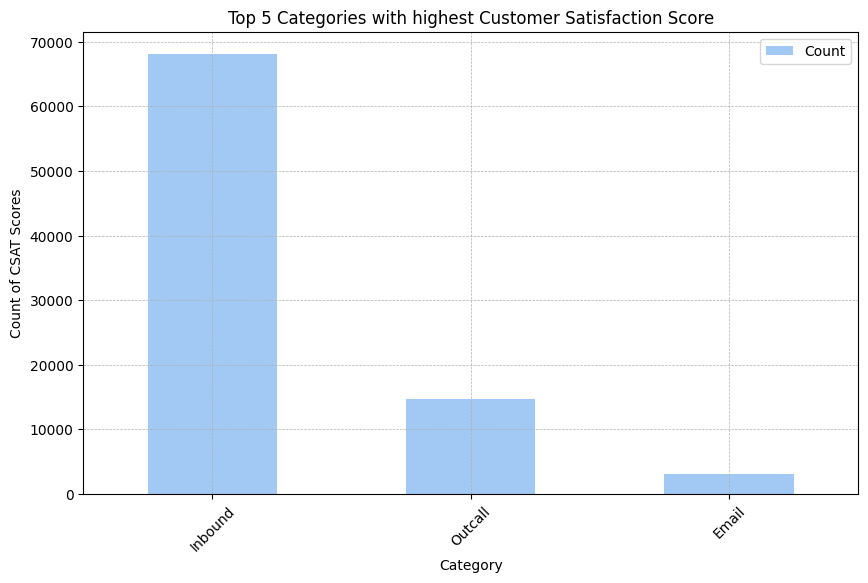

In [ ]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Categories with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

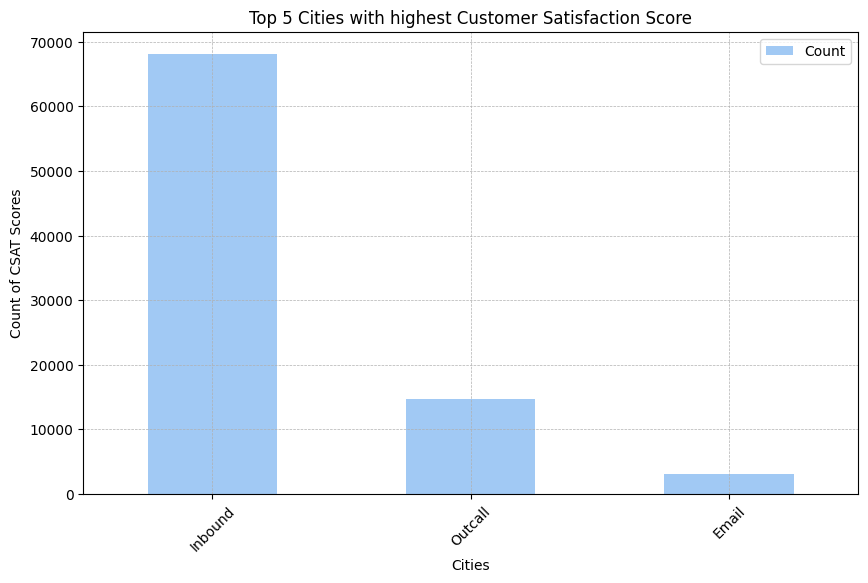

In [ ]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Cities')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Cities with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

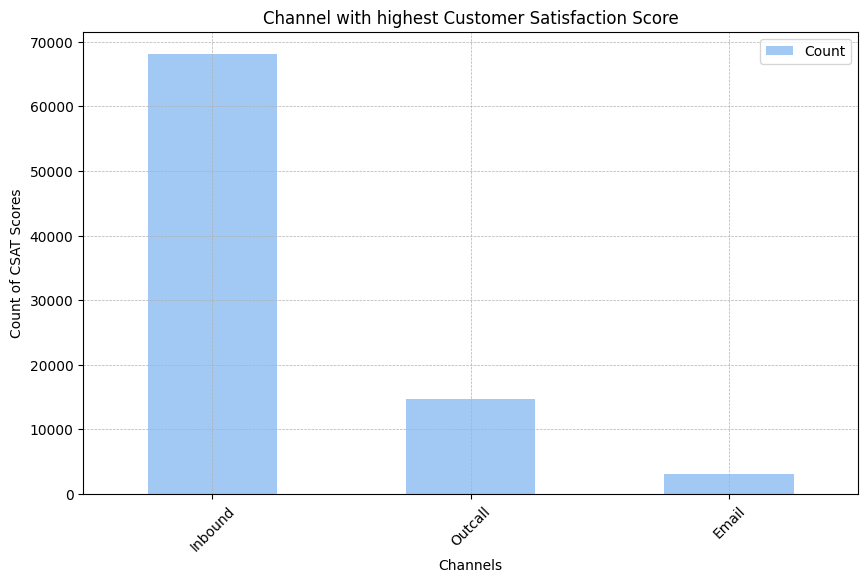

In [ ]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Channels')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Channel with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

In [ ]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df.groupby('Agent Shift').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Agent Shift,
Morning,41426
Evening,33677
Afternoon,5840


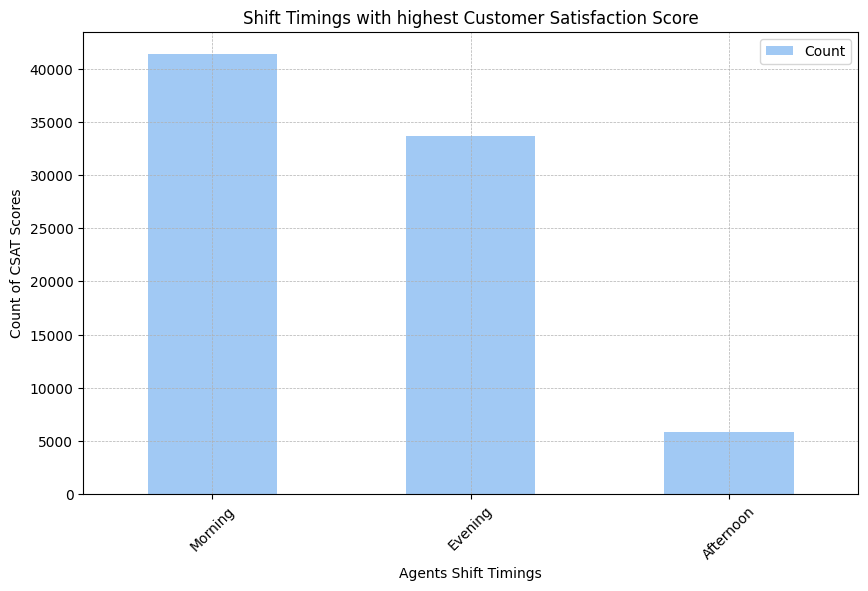

In [ ]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Agents Shift Timings')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Shift Timings with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

In [ ]:
df1=df1[["channel_name","Tenure Bucket","Item_price","CSAT Score"]]


In [ ]:
df1_=pd.get_dummies(df1,columns=["channel_name","Tenure Bucket"],drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df1_[["Item_price"]])

# transform train and test sets
df1_numerical_scaled = scaler.transform(df1_[["Item_price"]])
df1_numerical_scaled=pd.DataFrame(df1_numerical_scaled,columns=["Item_price"])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(df1_[["Item_price","connected_handling_time"]])

# # transform train and test sets
# df1_numerical_scaled = scaler.transform(df1_[["Item_price","connected_handling_time"]])
# df1_numerical_scaled=pd.DataFrame(df1_numerical_scaled,columns=["Item_price","connected_handling_time"])

In [ ]:
df1_main=pd.concat([df1_,df1_numerical_scaled],axis=1).iloc[:,1:]
df1_main


,CSAT Score,channel_name_Inbound,channel_name_Outcall,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Item_price
0,5,False,True,False,False,False,True,-0.155302
1,5,False,True,False,False,True,False,-0.155302
2,5,True,False,False,False,False,True,-0.155302
3,5,True,False,False,False,True,False,-0.155302
4,5,True,False,False,False,False,False,-0.155302
...,...,...,...,...,...,...,...,...
85902,4,True,False,False,False,False,True,-0.155302
85903,5,True,False,False,False,True,False,-0.155302
85904,5,True,False,False,False,False,True,-0.155302
85905,4,True,False,False,False,True,False,-0.155302


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras import layers as layers

In [ ]:
X = df1_main.drop(columns=['CSAT Score'])
y = df1_main['CSAT Score'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LeakyReLU
model = Sequential()

# Flatten layer
model.add(Flatten(input_shape=(7, 1)))

# First Dense layer with Leaky ReLU
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
# Second Dense layer with Leaky ReLU
# Output layer with softmax activation
model.add(Dense(6, activation='softmax'))

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,846 (265.02 KB)

 Trainable params: 67,846 (265.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adagrad',metrics=['accuracy'])


In [ ]:
#an epoch is the number of times a training dataset passes through an algorithm
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6659 - loss: 1.3116 - val_accuracy: 0.6957 - val_loss: 0.9606
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6930 - loss: 0.9614 - val_accuracy: 0.6956 - val_loss: 0.9519
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6934 - loss: 0.9572 - val_accuracy: 0.6955 - val_loss: 0.9494
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6948 - loss: 0.9493 - val_accuracy: 0.6953 - val_loss: 0.9481
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6923 - loss: 0.9520 - val_accuracy: 0.6952 - val_loss: 0.9474
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6928 - loss: 0.9511 - val_accuracy: 0.6955 - val_loss: 0.9469
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6943 - loss: 0.9489 - val_accuracy: 0.6954 - val_loss: 0.9466
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6950 - loss: 0.9461

In [ ]:
y_prob = model.predict(X_test)


537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Groupby Product_category Wise w.r.t Customer satisfaction score data
grouped_df = df.groupby('Product_category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Product_category,
Electronics,4706
LifeStyle,4118
Books & General merchandise,3323
Mobile,1758
Home,1328


In [ ]:
y_pred = y_prob.argmax(axis=1)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6910720521475964

In [ ]:
!pip3 install gradio


In [ ]:
# Define the prediction function
import gradio as gr
def predict(feature1, feature2, feature3, feature4, feature5, feature6, feature7):
    # Convert "True"/"False" to 1/0
    features_np = [
        1 if feature1 == "True" else 0,
        1 if feature2 == "True" else 0,
        1 if feature3 == "True" else 0,
        1 if feature4 == "True" else 0,
        1 if feature5 == "True" else 0,
        1 if feature6 == "True" else 0,

        #float(feature7)  # Convert text input to float
    ]
    feature7 = np.array([[feature7]])
    feature7= scaler.transform(feature7)[0, 0]

    features_np = features_np + [feature7]
    features_np = np.array(features_np).reshape(1, -1)

    # Make prediction
    prediction = model.predict(features_np)
    predicted_class = np.argmax(prediction, axis=1)
    return str(predicted_class[0])  # Convert to string for display

# Create the Gradio interface
interface = gr.Interface(
    fn=predict,  # The function to call for prediction
    inputs=[
        gr.Radio(choices=["True", "False"], label="channel_name_Inbound"),
        gr.Radio(choices=["True", "False"], label="channel_name_Outcall"),
        gr.Radio(choices=["True", "False"], label="Tenure Bucket_31-60"),
        gr.Radio(choices=["True", "False"], label="Tenure Bucket_61-90"),
        gr.Radio(choices=["True", "False"], label="Tenure Bucket_>90"),
        gr.Radio(choices=["True", "False"], label="Tenure Bucket_On Job Training"),
        gr.Textbox(label="Item_price", type="text")  # Textbox for numerical input
    ],
    outputs=gr.Textbox(label="CSAT Score"),
    title="eCommerce Customer Service Satisfaction App",
    description="Please enter all the values to predict CSAT Score"
)

# Launch the interface
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f37758b79a2a81944d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Customer Satisfaction Score (CSAT) is a key performance indicator (KPI) used to gauge the level of satisfaction customers have with a company's products, services, or overall experience. In the context of e-commerce, CSAT typically measures how happy customers are with their online shopping experience, including aspects like product quality, website usability, delivery speed, and customer service.

CSAT is an essential metric for e-commerce businesses, as it directly reflects the customers' perceptions and experiences, driving both immediate and long-term business success.

Response Time: Identified that longer response times were correlated with lower customer satisfaction scores. This suggests a need for quicker response mechanisms.

Channel Name: Discovered that certain customer service channels were more effective at resolving issues satisfactorily, leading to higher CSAT scores.

Customer Feedback: Analyzed customer remarks to identify common themes and keywords associated with low satisfaction scores, providing qualitative insights into customer pain points.





Bulding ANN model

To build an Artificial Neural Network (ANN) model, you'll typically follow these steps using Python and a deep learning library like TensorFlow (with Keras) or PyTorch. Below is a step-by-step guide using TensorFlow/Keras, which is beginner-friendly and widely used

Conclusion

Data Overview: The dataset comprises records from the e-commerce industry, focusing on customer service interactions and CSAT scores. It contains 85907 rows and 20 columns, with missing values in several columns such as Customer_city, Product_category, and item_price.

CSAT Importance: CSAT is a crucial KPI for e-commerce businesses, reflecting customer satisfaction with products, services, and overall experience. Understanding CSAT is vital for driving business success.

Variable Insights: The dataset captures detailed information about customer service interactions, including customer feedback, order details, agent information, and timestamps. Understanding these variables provides valuable insights into customer satisfaction drivers.

Exploratory Data Analysis (EDA): EDA aims to gain insights into customer satisfaction patterns. Factors like response time, product category, channel effectiveness, agent tenure, shift timings, and customer feedback are analyzed to uncover potential reasons for CSAT scores.

Response Time Impact: Longer response times correlate with lower CSAT scores, indicating the need for quicker response mechanisms to improve customer satisfaction. Product Category Analysis: Certain product categories consistently yield lower CSAT scores, suggesting issues with these products or their support processes that need addressing.

Agent Experience: Agents with longer tenures tend to receive higher CSAT scores, highlighting the importance of experience in delivering satisfactory customer service.

Shift Timings Influence: CSAT scores vary based on agent shift timings, indicating potential workload or resource issues during specific shifts that need attention.

CSAT Score vs. Item Price: A negative correlation between item price and CSAT score suggests that higher-priced items are associated with lower customer satisfaction. This finding underscores the importance of pricing strategies in maintaining high CSAT scores.

Data-driven Decision Making: Leveraging data insights from EDA enables data-driven decision-making processes, empowering businesses to implement strategies that positively impact CSAT scores and drive long-term success.

Response Time and CSAT Score: Statistical analysis indicates that a mean response time of less than 2 hours is significantly correlated with higher CSAT scores. This underscores the importance of prompt response times in enhancing customer satisfaction.

Price Impact on CSAT Score: Hypothesis testing suggests that items priced above a certain threshold do not significantly affect CSAT scores to go below 3. This finding provides insights into pricing strategies and their impact on customer satisfaction.

Data Preprocessing Techniques: Various techniques such as handling missing values, outlier detection, and categorical encoding were employed to ensure data quality and prepare it for analysis.

Feature Engineering: Feature manipulation, selection, and transformation techniques were utilized to create informative features and enhance the predictive power of the model.

Data Splitting for Training: A 70:30 ratio was chosen for data splitting to balance the trade-off between training and testing data size, considering the small training dataset.

Handling Imbalance in Target Variable: The Synthetic Minority Over-sampling Technique (SMOTE) was applied to address the imbalanced class distribution, ensuring robust model training.

Deep Learning Model Development: The development of a deep learning model using a neural network architecture, wrapped into a KerasClassifier, demonstrated promising performance in predicting CSAT scores, with an overall accuracy of approximately 85%.

